# Greedy Algorithm
- 최적화(optimization) 문제를 해결하는 문제 방식 중 하나  
- 선택 과정에서 모든 데이터를 고려하지 않고 근시안적으로 욕심을 내어 최소(최대)값을 가진 데이터 선택
- 구간 스케줄링, 구간 분할, 초 증가 순서, 최소 신장 트리, 최단 경로, 허프만 코딩

## Task Scheduling
- 각 테스크는 시작과 종료 시각을 가진다.
- 태스크를 처리할 프로세서는 수행 시간이 겹치지 않게 태스크를 할당
- 그리디 알고리즘으로 최적해를 찾을 수 있는 태스크 스케줄링 문제 : 구간 스케줄링, 구간 분할 문제

### Interval Scheduling (구간 스케줄링)
- n개의 task와 1개의 processer
- 수행 시간이 겹치지 않게 가장 많은 태스크를 프로세서에 할당
- 어떤 태스크들은 수행되지 않을 수도 있다.

#### [예제] 동아리 미팅룸 배정
7개의 동아리가 토요일에 중앙도서관 미팅룸에서 회의하려고 요청하였다. 어떻게 하면 가장 많은 수의 동아리들이 미팅룸을 사용할 수 있을까?
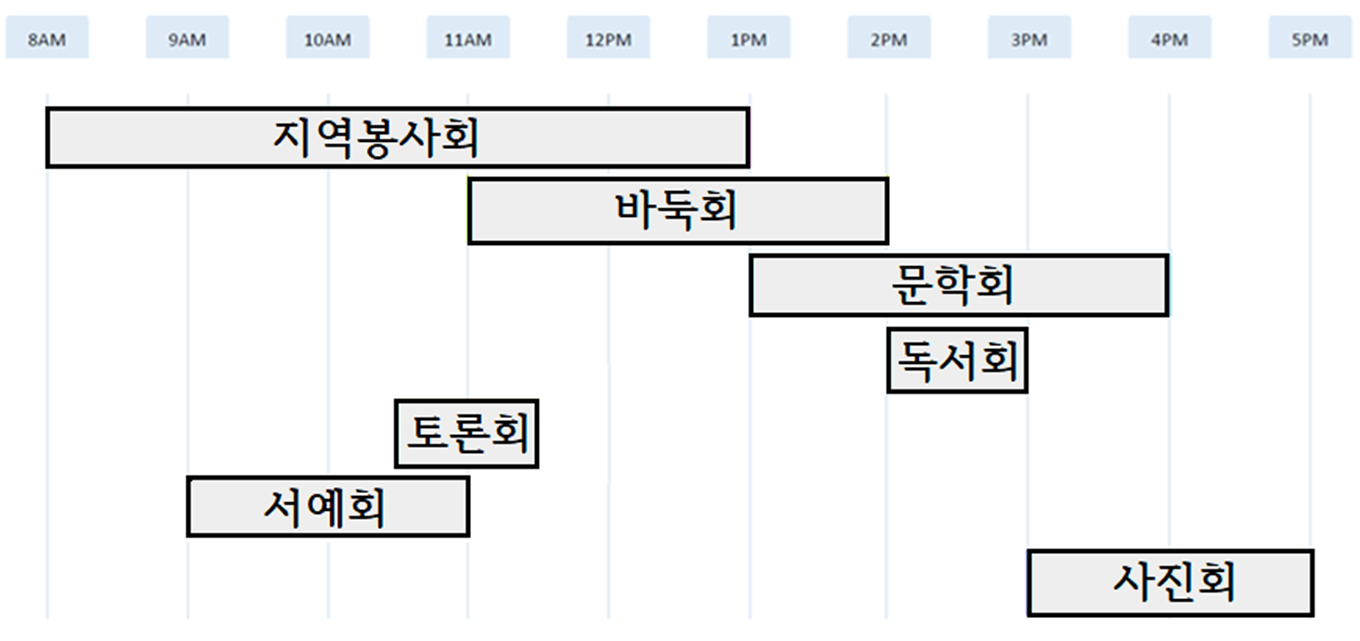

##### 구간 스케줄링 알고리즘
1. 종료 시각으로 정렬한다.
2. 가장 일찍 종료하는 동아리를 선택한다.
3. 다음 동아리의 시작 시각이 직전에 선택된 동아리의 종료 시각 이전이면 다음 동아리를 포기하고, 이후이면 다음 동아리를 선택한다.

In [ ]:
# 구간 스케줄링 알고리즘 구현하기
# 1. 종료 시각으로 정렬한다.
# 2. 가장 일찍 종료하는 동아리를 선택한다.
# 3. 다음 동아리의 시작 시각이 직전에 선택된 동아리의 종료 시각 이전이면
#    다음 동아리를 포기하고, 이후이면 다음 동아리를 선택한다.

# 미팅룸 신청 리스트
a = [['지역봉사회',8,13],['서예회',9,11],['토론회',10,12],['바둑회',11,14],
 ['문학회',13,16],['독서회',14,15],['사진회',15,17]]
print('정렬 전 : ',a)

# 종료 시각으로 정렬하기
a.sort(key=lambda t:t[2])
print('정렬 후 : ',a)

solution = [a[0]]
i=0
print('선택된 동아리 : ', solution)

정렬 전 :  [['지역봉사회', 8, 13], ['서예회', 9, 11], ['토론회', 10, 12], ['바둑회', 11, 14], ['문학회', 13, 16], ['독서회', 14, 15], ['사진회', 15, 17]]
정렬 후 :  [['서예회', 9, 11], ['토론회', 10, 12], ['지역봉사회', 8, 13], ['바둑회', 11, 14], ['독서회', 14, 15], ['문학회', 13, 16], ['사진회', 15, 17]]
선택된 동아리 :  [['서예회', 9, 11]]


In [ ]:
for j in range(1, len(a)):
  if a[j][1] >= a[i][2]:
    solution.append(a[j])
    i = j
  print('선택된 동아리 : ', solution)

선택된 동아리 :  [['서예회', 9, 11]]
선택된 동아리 :  [['서예회', 9, 11]]
선택된 동아리 :  [['서예회', 9, 11], ['바둑회', 11, 14]]
선택된 동아리 :  [['서예회', 9, 11], ['바둑회', 11, 14], ['독서회', 14, 15]]
선택된 동아리 :  [['서예회', 9, 11], ['바둑회', 11, 14], ['독서회', 14, 15]]
선택된 동아리 :  [['서예회', 9, 11], ['바둑회', 11, 14], ['독서회', 14, 15], ['사진회', 15, 17]]


##### 구간 스케줄링 수행 시간
1. 정렬 : O(nlogn)
2. 다음 task 배정 검사 (각 task당) : O(1)
3. 총 시간 : O(nlogn) + O(1)*n = O(nlogn)

### Interval Partitioning (구간 분할)
- n개의 태스크
- 최소의 프로세서를 사용
- 수행 시간이 겹치지 않게 모든 태스크를 프로세서에 배정

#### [예제] 모든 동아리에게 미팅룸을!
교내 동아리들이(또?) 토요일에 도서관 회의실 예약을 신청함. 각 동아리 미팅의 시작 시간과 종료 시각을 제출함.  
도서관은 모든 동아리의 미팅을 위해 최소의 회의실을 사용하여 미팅 스케줄을 정하려고 한다.
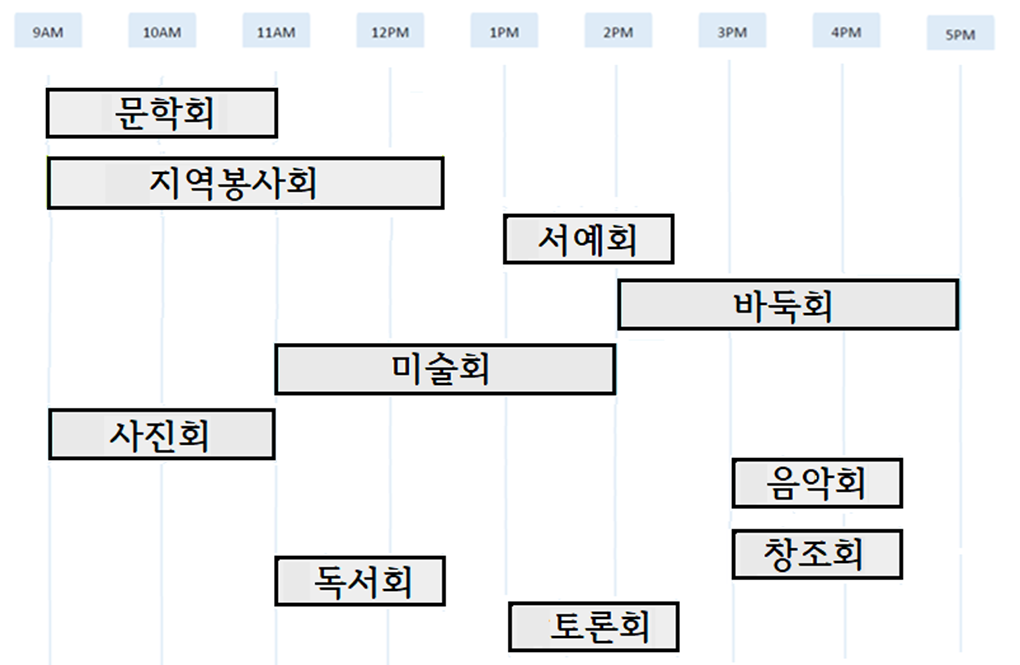

##### 구간 분할 알고리즘


In [ ]:
# 알고리즘 구현하기
#1. 동아리들을 시작 시각으로 정렬한다.
#2. 첫 동아리를 미팅룸 1에 배정한다.
#3. 다음 동아리를 기존의 미팅룸에 배정할 수 있으면 배정하고,
#   배정할 수 없으면 새 미팅룸에 배정한다.

a = [['문학회', 9.0, 11.0], ['지역봉사회', 9.0, 12.5], ['서예회', 13.0, 14.5],
     ['바둑회', 14.0, 17.0], ['미술회', 11.0, 14.0], ['사진회', 9.0, 11.0],
     ['음악회', 15.0, 16.5], ['창조회', 15.0, 16.5], ['독서회', 11.0, 12.5],
     ['토론회', 13.0, 14.5]]

n = len(a)
a.sort(key=lambda x: x[1])  # 시작 시간으로 정렬

solution = [[a[0]]]
finish_time = [a[0][2]]  # 직전 선택된 동아리 미팅 종료 시간

k = 0  # 미팅룸0
for i in range(1, n):   #동아리(태스크)당 반복
    flag = False
    for j in range(k+1):               # 미팅룸당 반복
        if a[i][1] >= finish_time[j]:  # 현재 동아리 a[i]를 미팅룸 j에
            solution[j].append(a[i])   # 할당 가능하면 solution[j] 뒤에 추가
            finish_time[j] = a[i][2]   # 미팅룸[j]의 finish_time 갱신
            flag = True                # 다음 동아리를 위해 for-루프로
            break
    if not flag:  # 새 미팅룸 만들기
        k += 1
        solution.append([a[i]])
        finish_time.append(a[i][2])

for i in range(k+1):
    print('미팅룸', i+1, ':', solution[i])

미팅룸 1 : [['문학회', 9.0, 11.0], ['미술회', 11.0, 14.0], ['바둑회', 14.0, 17.0]]
미팅룸 2 : [['지역봉사회', 9.0, 12.5], ['서예회', 13.0, 14.5], ['음악회', 15.0, 16.5]]
미팅룸 3 : [['사진회', 9.0, 11.0], ['독서회', 11.0, 12.5], ['토론회', 13.0, 14.5], ['창조회', 15.0, 16.5]]


##### 구간 분할 수행 시간

## 초 증가 순서 (Super Increasing Sequence)
주어진 숫자들에 대해 각 숫자가 자신보다 앞선 숫자들의 합 보다 크면 이런 숫자들을 초 증가 순서라고 함  

[예] 4개의 숫자 {3,4,5,6}에서 합이 K가 되는 숫자들을 모든 조합을 검사하여 찾으려면 최악의 경우 몇 번을 검사해야 할까?

[예] 거스름돈을 동전으로 받을 때의 알고리즘을 생각해 보자.

### Greedy Subset Sum
초 증가 순서의 입력에 대한 합이 K가 되는 숫자 문제를 해결하는 그리디 알고리즘

1.   숫자를 역으로 정렬한다.
2.   현재 검사하는 숫자 x가 K보다 크면 x를 무시하고
3.   x가 K와 같거나 작으면 선택한다.
4.   K = K-x
5.   2~4는 K가 0이 될때까지 반복한다.



### [예제] 합이 85가 되는 수 찾기
{1,4,7,13,26,64,125,260,550}, K = 85가 주어졌을 때 집합의 어떤 숫자들을 선택해야 그 합이 85가 되는지 위의 알고리즘으로 찾아보자.

In [ ]:
# 위의 알고리즘 구현하기

### 156원을 거슬러 줄 때 선택해야 하는 동전 찾기
- 그리디 알고리즘으로
동전의 종류 리스트와 거스름돈을 매개변수로 하는 함수를 만들어 해결하기
- 동전 리스트가 초 증가 순서로 들어오지 않는다면?

In [ ]:
# 일반적으로 사용가능하게 함수로 만들기

### 수행시간

### 활용 예시
머클-헬만 배낭 암호 시스템
(Merkle-Hellman Knapsack Cryptosystem)  
전체 내용은 교재의 설명을 참고하세요~

## 최소 신장 트리 (Minimum Spanning Tree, MST)
- 트리는 점들이 서로 연결되어 있지만 사이클을 가지지 않음
- Spanning Tree(신장트리) : 그래프의 모든 점을 연결하는 트리
- 트리의 특성  
  (1) n개의 점을 가진 그래프의 신장 트리는 n-1개의 간선을 가짐  
  (2) 두 점 사이의 경로는 하나밖에 없다.
- 최소 신장 트리 (MST) : 간선에 가중치가 부여된 그래프에서 최소 가중치의 합을 가진 신장 트리  
  (1) Kruskal 알고리즘   
  (2) Prim 알고리즘
  

###   [Prim알고리즘]
   1. 임의의 점 하나를 선택하여 T에 넣는다.
   2. 다음을 n-1회 수행한다.
      T밖에 있는 점들 중에서 T에 있는 점과 가장 가까운 점을 T에 추가한다.
      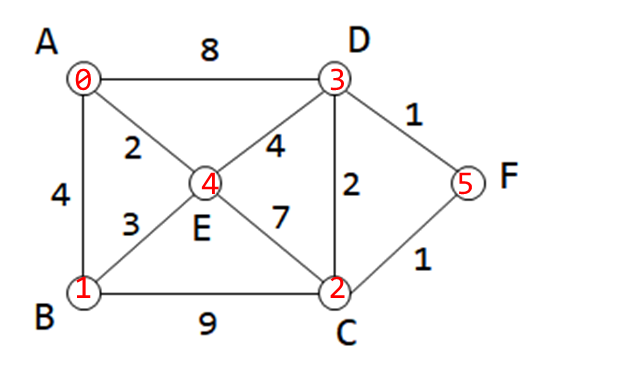

In [ ]:
# 프림 알고리즘 구현

### 수행시간


### 응용분야
- 컴퓨터 네트워크
- 전기 선로 네트워크
- 상하수도 네트워크
- 서킷 디자인
- 클러스터링
- 외판원 문제를 위한 근사 알고리즘

### [실습과제] 최소 스패닝 트리

**문제**  

---

그래프가 주어졌을 때, 그 그래프의 최소 스패닝 트리를 구하는 프로그램을 작성하시오.

최소 스패닝 트리는, 주어진 그래프의 모든 정점들을 연결하는 부분 그래프 중에서 그 가중치의 합이 최소인 트리를 말한다.

**입력**  

---


첫째 줄에 정점의 개수 V(1 ≤ V ≤ 10,000)와 간선의 개수 E(1 ≤ E ≤ 100,000)가 주어진다. 다음 E개의 줄에는 각 간선에 대한 정보를 나타내는 세 정수 A, B, C가 주어진다. 이는 A번 정점과 B번 정점이 가중치 C인 간선으로 연결되어 있다는 의미이다. C는 음수일 수도 있으며, 절댓값이 1,000,000을 넘지 않는다.

그래프의 정점은 1번부터 V번까지 번호가 매겨져 있고, 임의의 두 정점 사이에 경로가 있다. 최소 스패닝 트리의 가중치가 -2,147,483,648보다 크거나 같고, 2,147,483,647보다 작거나 같은 데이터만 입력으로 주어진다.
  
   
**출력**  

---
첫째 줄에 최소 스패닝 트리의 가중치를 출력한다.

**예제 입력 1**

---
```
3 3
1 2 1
2 3 2
1 3 3
```


**예제 출력 1**

---
```
3
```

*출처 : https://www.acmicpc.net/problem/1197

In [ ]:
# 프림 알고리즘으로 풀어보기













## 1107 여기서부터


## 최단 경로 (Shortest Path) 찾기
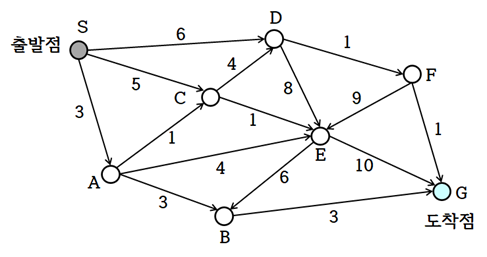



### 생각해 보기
(1) 교차점에서 욕심내어 가장 짧은 길(간선)을 선택하기  
(2) 최소 신장 트리 (MST)를 이용하기  
(3) 프림 알고리즘 응용 -> 다익스트라 알고리즘  

### Dijkstra 알고리즘
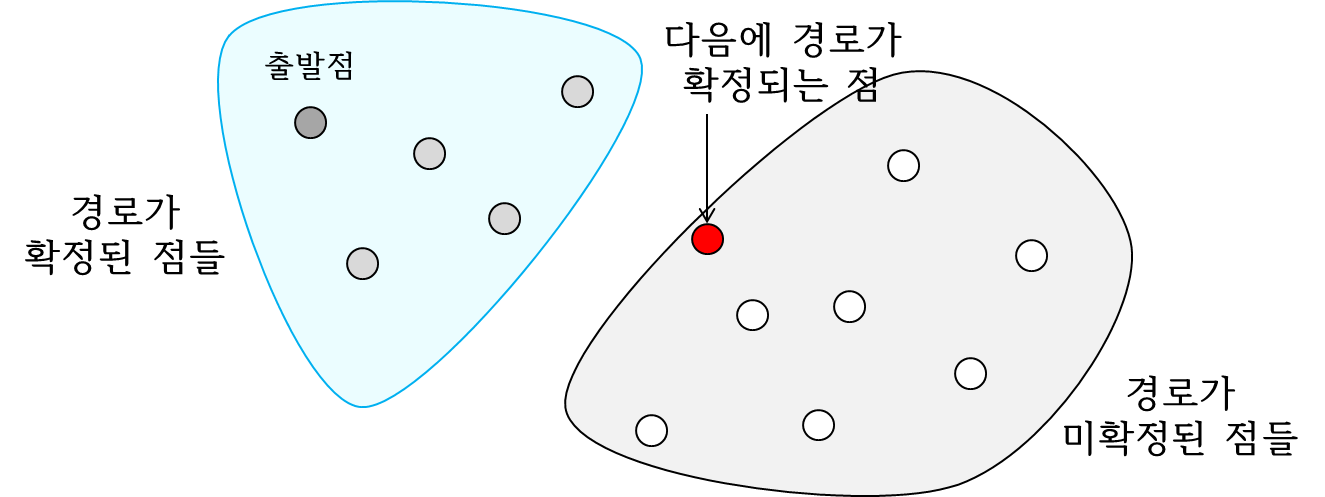

**프림 알고리즘과의 차이**
1. 프림 알고리즘은 임의의 점에서 시작, 다익스트라 알고리즘은 출발점에서 시작
2. 프림 알고리즘은 트리에 정점 하나를 추가할 때 현재 트리에서 가장 가까운 점을 추가하지만, 다익스트라 알고리즘은 최단거리가 확정되지 않은 점들 중에서 출발점에서 가장 가까운 점을 추가하고 추가된 점의 최단 거리를 확정한다.

**다익스트라 알고리즘**
[더블클릭하여 정리해보기]

### [예제] 실-단추 모형으로 만든 다음 그래프를 다익스트라 알고리즘으로 출발점인 S에서 각 점까지의 최단 경로와 거리를 찾아보자.
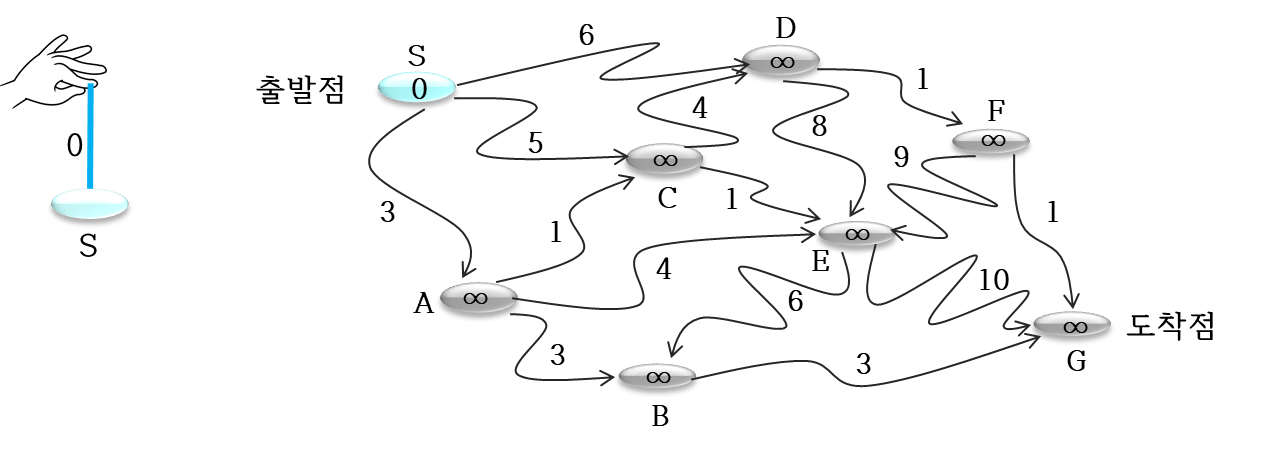

In [29]:
# 다익스트라 알고리즘 구현

n=8
s=0
g=[[]]*n
g[0] = [[1, 3], [3, 5], [4, 6]]
g[1] = [[2, 3], [3, 1], [5, 4]]
g[2] = [[3, 7]]
g[3] = [[4, 4], [5, 1]]
g[4] = [[5, 8], [6, 1]]
g[5] = [[2, 6], [7, 10]]
g[6] = [[5, 9], [7, 1]]
g[7] = []

def Dijstra(g, start):
    n= len(g)
    s= start
    included = [False for _ in range(n)]
    distance = [float('inf')for _ in range(n)]
    distance[s] = 0
    previous = [-1 for _ in range(n)]
    previous[s] = 0

    for k in range(n):
        m = -1
        min_value = float('inf')
        for j in range(n):
            if not included[j] and distance[j] < min_value:
                min_value = distance[j]
                m = j
        included[m] = True

    #    print(f'm(정점):{m}, min_value(최소거리):{min_value}')
    #    print(f'included:{included}')

        for w, wt in g[m]:
            if not included[w] and distance[m] + wt < distance[w]:
                distance[w] = distance[m] + wt
                previous[w] = m

    #    print(f'distance:{distance}')
    #    print(f'previous:{previous}')   
    #    print('='*60)


    print('\n정점', s,'(으)로부터 최단거리:')
    for i in range(n):
        if distance[i]==float('inf'):
            print(s, '와(과) ', i, '사이에 경로 없음')
        else:
            print(f'[{s}, {i}] = {distance[i]}')

    print('\n정점', s,'(으)로부터 최단경로:')
    for i in range(n):
        back = i
        print(back, end='')
        while back != s:
            print(' <-',previous[back], end = '')
            back = previous[back]
        print()


Dijstra(g,0)



정점 0 (으)로부터 최단거리:
[0, 0] = 0
[0, 1] = 3
[0, 2] = 6
[0, 3] = 4
[0, 4] = 6
[0, 5] = 5
[0, 6] = 7
[0, 7] = 8

정점 0 (으)로부터 최단경로:
0
1 <- 0
2 <- 1 <- 0
3 <- 1 <- 0
4 <- 0
5 <- 3 <- 1 <- 0
6 <- 4 <- 0
7 <- 6 <- 4 <- 0


### 수행시간

- 루프는 총 n회 반복- 루프가 반복될 때마다 1개의 정점의 최단 거리 확정   
- 루프는 1회 반복될 때 미확정된 점들 중에서 distance[] 값이 최소인 점을 찾으므로 O(n) 시간  
- 간선 완화: O(n) 시간  
- 알고리즘의 수행 시간: O(n2)  
- 최소 힙을 사용하면 O(mlogn), m은 간선 수


### 응용

- 내비게이션 장치
- 맵퀘스트(Mapquest)
- 구글 맵스(Google Maps)와 같은 웹 서비스
- 네트워크 분야
- 소셜 네트워크 분석
- 산업 공학
- 경영 공학
- 로봇 공학
- 교통 공학
- VLSI 디자인 분야 등


### [실습과제] 최단경로
출처 https://www.acmicpc.net/problem/1753

**문제**  

---
방향그래프가 주어지면 주어진 시작점에서 다른 모든 정점으로의 최단 경로를 구하는 프로그램을 작성하시오. 단, 모든 간선의 가중치는 10 이하의 자연수이다.

**입력**  

---
첫째 줄에 정점의 개수 V와 간선의 개수 E가 주어진다. (1 ≤ V ≤ 20,000, 1 ≤ E ≤ 300,000) 모든 정점에는 1부터 V까지 번호가 매겨져 있다고 가정한다. 둘째 줄에는 시작 정점의 번호 K(1 ≤ K ≤ V)가 주어진다. 셋째 줄부터 E개의 줄에 걸쳐 각 간선을 나타내는 세 개의 정수 (u, v, w)가 순서대로 주어진다. 이는 u에서 v로 가는 가중치 w인 간선이 존재한다는 뜻이다. u와 v는 서로 다르며 w는 10 이하의 자연수이다. 서로 다른 두 정점 사이에 여러 개의 간선이 존재할 수도 있음에 유의한다.

**출력**  

---
첫째 줄부터 V개의 줄에 걸쳐, i번째 줄에 i번 정점으로의 최단 경로의 경로값을 출력한다. 시작점 자신은 0으로 출력하고, 경로가 존재하지 않는 경우에는 INF를 출력하면 된다.


**예제 입력 1**  

---
```
5 6
1
5 1 1
1 2 2
1 3 3
2 3 4
2 4 5
3 4 6  
```
**예제 출력 1**  

---
```
0
2
3
7
INF
```

In [40]:
# 풀이
def Dijstra2(g, start):
    n= len(g)
    s= start
    included = [False for _ in range(n)]
    distance = [float('inf')for _ in range(n)]
    distance[s] = 0
    previous = [-1 for _ in range(n)]
    previous[s] = 0

    for k in range(n):
        m = -1
        min_value = float('inf')
        for j in range(n):
            if not included[j] and distance[j] < min_value:
                min_value = distance[j]
                m = j
        included[m] = True

        if m>=0:
            for w, wt in g.get(m):
                if not included[w] and distance[m] + wt < distance[w]:
                    distance[w] = distance[m] + wt
                    previous[w] = m

    for i in range(n):
        print(distance[i])
        

v, e =map(int, input().split(' '))
s = int(input())
g_list = [list(map(int, input().split(' ')))for _ in range(e)]

print(g_list)

g_keys = range(v)
g_dict = {g_key : [] for g_key in g_keys}
for a in g_list:
    a[0] -= 1
    a[1] -= 1
    g_dict[a[0]].append(a[1:])

print(g_list)



[[5, 1, 1], [1, 2, 2], [1, 3, 3], [2, 3, 4], [2, 4, 5], [3, 4, 6]]
[[4, 0, 1], [0, 1, 2], [0, 2, 3], [1, 2, 4], [1, 3, 5], [2, 3, 6]]
inf
0
4
5
inf


In [42]:

Dijstra2(g_dict,s-1)

0
2
3
7
inf


### [실습과제] 최소비용 구하기
**문제**

---


N개의 도시가 있다. 그리고 한 도시에서 출발하여 다른 도시에 도착하는 M개의 버스가 있다. 우리는 A번째 도시에서 B번째 도시까지 가는데 드는 버스 비용을 최소화 시키려고 한다. A번째 도시에서 B번째 도시까지 가는데 드는 최소비용을 출력하여라. 도시의 번호는 1부터 N까지이다.

**입력**

---


첫째 줄에 도시의 개수 N(1 ≤ N ≤ 1,000)이 주어지고 둘째 줄에는 버스의 개수 M(1 ≤ M ≤ 100,000)이 주어진다. 그리고 셋째 줄부터 M+2줄까지 다음과 같은 버스의 정보가 주어진다. 먼저 처음에는 그 버스의 출발 도시의 번호가 주어진다. 그리고 그 다음에는 도착지의 도시 번호가 주어지고 또 그 버스 비용이 주어진다. 버스 비용은 0보다 크거나 같고, 100,000보다 작은 정수이다.

그리고 M+3째 줄에는 우리가 구하고자 하는 구간 출발점의 도시번호와 도착점의 도시번호가 주어진다. 출발점에서 도착점을 갈 수 있는 경우만 입력으로 주어진다.

**출력**

---


첫째 줄에 출발 도시에서 도착 도시까지 가는데 드는 최소 비용을 출력한다.

**예제 입력**

---

```
5
8
1 2 2
1 3 3
1 4 1
1 5 10
2 4 2
3 4 1
3 5 1
4 5 3
1 5
```

**예제 출력**

---

```
4
```

ValueError: not enough values to unpack (expected 2, got 1)

## 다양한 길찾기 알고리즘
https://qiao.github.io/PathFinding.js/visual/

## 허프만 코딩 (Huffman Coding)
그리디 알고리즘에 초점을 둔 대표적인 파일 압축 알고리즘

고정된 크기의 코드로 만들어진 파일을 저장하거나 전송할 때 파일의 크기를 줄이고 필요할 때 원래의 파일로 변환할 수 있을 때의 이득
- 메모리 공간을 적게 사용
- 파일 전송 시간 단축

어떻게 할까?

### 생각해보기
[1] 문자에 따라 다른 크기의 코드 부여하기
- 빈도수에 따라 코드 길이를 가변적으로 부여하면 좋을 것   

[2] 빈도수에 따라 코드 길이를 어떻게 정할까?
- 이진 트리 사용
- 복호화의 문제

[3] 복원 문제를 해결하려면?
- 특수 문자 끼워넣기
- **Prefix-free 속성**

### 허프만 트리 알고리즘

1. 압축할 파일을 스캔하여 각 문자의 빈도수를 계산한다.
2. 문자마다 문자와 빈도수를 가진 이파리 노드를 만든다.
3. 빈도수가 가장 적은 두 노드의 부모를 만들어 빈도수의 합을 저장한다.
4. 노드가 하나만 남으면 남은 노드를 허프만 트리의 루트로 반환
6. 아니면 자식이 된 노드들을 제외하고 3번으로 간다.
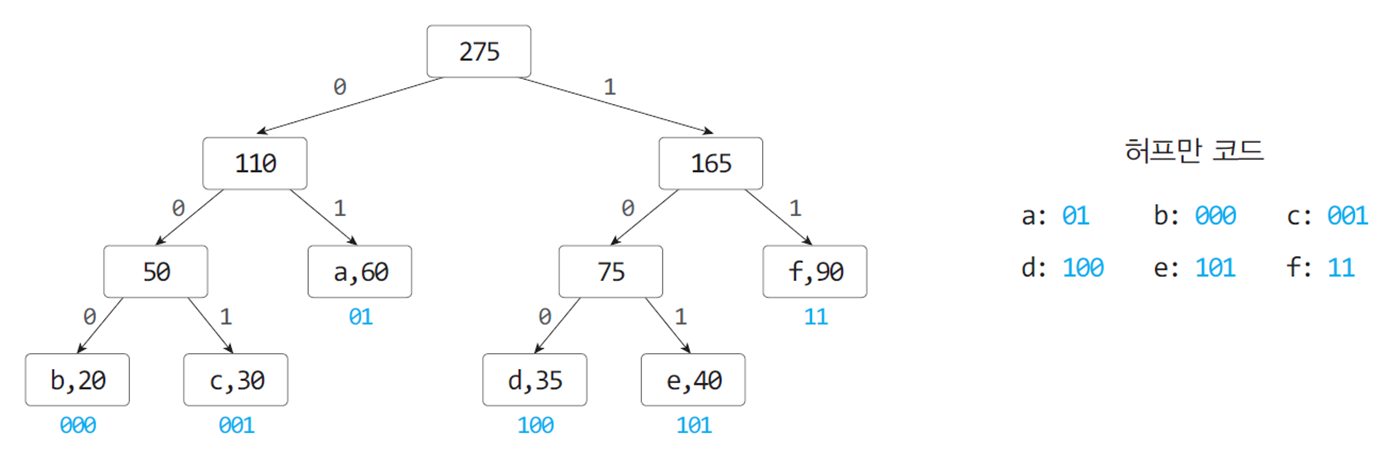

### Decoding
압축된 비트 스트링의 첫 번째 비트부터 읽음  
루트에서 시작하여 0이면 왼쪽 자식으로  
1이면 오른쪽 자식으로 내려가서  
이파리에 도달하면 해당 문자로 복원  
-> 이후 모든 스트링에 대해서 반복  